In [1]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
 h2 {
    font-size: var(--jp-content-font-size4);
    background-color: #FF0000 ;
    color: yellow;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 150px 70px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }
</style>
''')

## Dataset Description  :

* this Dataset Download from Kaggle .  

*  This dataset provides a detailed overview of student performance in various schools, focusing on academic achievements and demographic factors. It includes critical    information such as student IDs, gender, age, grade levels, and scores in key subjects like mathematics, reading, and writing. Additionally, it captures attendance records,  offering insights into how presence in school correlates with academic success.

* The dataset is designed to help educators, researchers, and data scientists explore and analyze factors that impact student performance. By examining this data, one can identify trends, uncover relationships between different variables, and develop strategies to enhance educational outcomes. Whether you are building predictive models, conducting educational research, or looking to understand the dynamics of student performance, this dataset provides a rich source of information.


In [2]:
# image 1:
from IPython.display import display ,Image

img1 = 'https://storage.googleapis.com/kaggle-datasets-images/5447351/9036800/c049d654a5cc589e658f5eb3ee3376fc/dataset-cover.jpg?t=2024-07-26-04-31-50'
display(Image(url=img1))

## understanding the problem & Target :

  * problem : this problem consider as Analysis problem

  
  * Solving Techniques : By using ordinary Statistical pkgs

     
  
  * we will Make Some Analysis by using both pandas and sql , DataExplantory , Data cleaning , data processing ,

     data visualization , split and preparing data to bulding models .
  

In [3]:
# image2 :

img2="https://cdn.pixabay.com/photo/2017/04/06/06/54/school-2207391_640.jpg"
display(Image(url=img2))
 

## Features Describtion :

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| StudentID            | A unique identifier assigned to each student.                                                                                       |
| Gender          | The gender of the student (e.g., Male, Female)                                                                                       |
| Age                      | The age of the student in years.                                                                                |
| GradeLevel           | The current grade level of the student (e.g., 9th Grade, 10th Grade).                                                                                          |
| MathScore               |The student's score in mathematics.                                                                                      |
| ReadingScore        | The student's score in reading.                                                                               |
| WritingScore               | The student's score in writing.                                                                                |
| Attendance            | The number of days the student was present at school during the academic year.                                                                           |
| Annual_Premium            | how much of Annunal in the year                                                                      |
| Policy_Sales_Channel      | to the method or channel through which an insurance policy is sold or distributed to the customer. In the context of insurance, sales channels                                                                                            |
| Vintage     | ventage vechial                                                                          |
| Response         | take positive or negative Response (1,0)                              |


 ## pandas Analysis :

In [4]:
# imports :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.impute import SimpleImputer
import sqlite3
import re
from IPython.display import display ,Image
from plotly.graph_objs import *
import plotly.express as px 


In [5]:
# load the data:

data=pd.read_csv("/kaggle/input/student-performance-dataset/student_performance_data.csv")
data.head(25)

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No
5,6,Female,20,17,86.01,2.47,Business,Yes,No
6,7,Male,19,21,55.33,3.93,Arts,No,No
7,8,Male,18,14,57.00,2.51,Education,No,No
8,9,Male,19,9,63.18,3.32,Business,No,No
9,10,Female,24,1,63.32,3.96,Engineering,Yes,Yes


In [6]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Age                        500 non-null    int64  
 3   StudyHoursPerWeek          500 non-null    int64  
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    object 
 7   PartTimeJob                500 non-null    object 
 8   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB
None
-------------------------
shape of the dataset -->> (500, 9)


In [7]:
#get the statistical:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
Age,500.0,20.95600,2.000517,18.00,19.0000,21.00,23.00,24.00
StudyHoursPerWeek,500.0,19.87600,11.471347,1.00,10.0000,20.50,30.00,39.00
AttendanceRate,500.0,74.99038,14.565917,50.01,62.6075,75.73,87.22,99.97
GPA,500.0,2.98516,0.563620,2.00,2.4875,3.00,3.48,3.99


In [8]:
# get Types of data:

data.dtypes

StudentID                      int64
Gender                        object
Age                            int64
StudyHoursPerWeek              int64
AttendanceRate               float64
GPA                          float64
Major                         object
PartTimeJob                   object
ExtraCurricularActivities     object
dtype: object

In [9]:
#check if there null values in data:
# NO Found any null values :
data.isna().mean()

StudentID                    0.0
Gender                       0.0
Age                          0.0
StudyHoursPerWeek            0.0
AttendanceRate               0.0
GPA                          0.0
Major                        0.0
PartTimeJob                  0.0
ExtraCurricularActivities    0.0
dtype: float64

In [10]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in StudentID -->> 
 StudentID
1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: count, Length: 500, dtype: int64
-------------------------
counts of items in Gender -->> 
 Gender
Female    256
Male      244
Name: count, dtype: int64
-------------------------
counts of items in Age -->> 
 Age
22    88
19    78
18    75
21    73
24    70
23    59
20    57
Name: count, dtype: int64
-------------------------
counts of items in StudyHoursPerWeek -->> 
 StudyHoursPerWeek
26    21
37    18
14    17
30    17
33    16
23    16
10    16
8     15
6     15
29    15
11    15
2     15
5     15
17    15
1     15
34    15
4     15
38    14
22    13
24    12
21    12
9     12
15    12
3     12
20    11
25    11
32    11
28    11
36    11
18    11
19    10
31    10
27     9
39     9
35     9
7      9
13     8
12     8
16     4
Name: count, dtype: int64
-------------------------
counts of items in AttendanceRate -->> 
 AttendanceRate


In [11]:
# i will drop StudentID column from dataset As it useless :
#Cleaning the dataset:
data=data.drop(columns="StudentID",axis=1)
data.head(15)

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,Male,24,37,90.75,3.47,Arts,Yes,No
1,Female,22,37,74.90,2.32,Education,No,No
2,Male,22,10,53.36,2.38,Business,No,No
3,Male,24,10,70.26,3.46,Science,Yes,No
4,Male,18,19,74.87,2.31,Education,Yes,No
5,Female,20,17,86.01,2.47,Business,Yes,No
6,Male,19,21,55.33,3.93,Arts,No,No
7,Male,18,14,57.00,2.51,Education,No,No
8,Male,19,9,63.18,3.32,Business,No,No
9,Female,24,1,63.32,3.96,Engineering,Yes,Yes


In [12]:
# to know the uniques values in evey column in the dataset:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>Gender column  :  
['Male' 'Female']
**************************************************
All items in the ---->>>Age column  :  
[24 22 18 20 19 23 21]
**************************************************
All items in the ---->>>StudyHoursPerWeek column  :  
[37 10 19 17 21 14  9  1 13  4 32 34 28 31  8 39 26  3 12  5 30 23 15  2
 11 38 18 27 33 24 29 20  6 16 25 22 36 35  7]
**************************************************
All items in the ---->>>AttendanceRate column  :  
[90.75 74.9  53.36 70.26 74.87 86.01 55.33 57.   63.18 63.32 86.61 62.54
 81.65 74.71 78.66 91.91 70.22 88.55 71.1  67.69 97.93 59.22 54.52 53.41
 91.85 71.86 95.78 86.08 80.52 97.47 69.83 97.7  56.75 74.19 63.5  76.99
 58.1  92.08 92.32 97.76 57.73 81.17 73.71 67.22 67.58 70.64 85.25 79.91
 72.98 53.8  53.89 50.12 98.38 50.26 55.15 65.73 90.37 98.1  89.5  84.53
 76.07 54.34 97.91 87.92 81.95 87.95 86.21 81.86 99.03 95.17 82.33 84.66
 52.58 83.5  52.21 79.41 99.97 77.79 73.66 65.64 56.03 86.55

In [13]:
# clean the columns of the dataset from precentage sign % or _ if found  :
# Remove special characters from column names
data.columns = data.columns.str.replace('[^A-Za-z0-9_]', '', regex=True) # this mean that will Remove all characters except the characters and Numbers :
data

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,Male,24,37,90.75,3.47,Arts,Yes,No
1,Female,22,37,74.90,2.32,Education,No,No
2,Male,22,10,53.36,2.38,Business,No,No
3,Male,24,10,70.26,3.46,Science,Yes,No
4,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...
495,Male,22,37,76.61,2.97,Science,No,No
496,Male,23,11,56.29,3.20,Science,No,No
497,Female,20,6,56.64,3.20,Science,No,Yes
498,Male,22,18,57.18,2.05,Business,No,Yes


In [14]:
# cleaning categorical features from the null values if found   :
for col in data.select_dtypes("object").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,Male,24,37,90.75,3.47,Arts,Yes,No
1,Female,22,37,74.90,2.32,Education,No,No
2,Male,22,10,53.36,2.38,Business,No,No
3,Male,24,10,70.26,3.46,Science,Yes,No
4,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...
495,Male,22,37,76.61,2.97,Science,No,No
496,Male,23,11,56.29,3.20,Science,No,No
497,Female,20,6,56.64,3.20,Science,No,Yes
498,Male,22,18,57.18,2.05,Business,No,Yes


In [15]:
# cleaning Numerical features from the null values if found   :
for col in data.select_dtypes("number").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,Male,24.0,37.0,90.75,3.47,Arts,Yes,No
1,Female,22.0,37.0,74.90,2.32,Education,No,No
2,Male,22.0,10.0,53.36,2.38,Business,No,No
3,Male,24.0,10.0,70.26,3.46,Science,Yes,No
4,Male,18.0,19.0,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...
495,Male,22.0,37.0,76.61,2.97,Science,No,No
496,Male,23.0,11.0,56.29,3.20,Science,No,No
497,Female,20.0,6.0,56.64,3.20,Science,No,Yes
498,Male,22.0,18.0,57.18,2.05,Business,No,Yes


In [16]:
# check agin the null values :
# No Any null values in dataset :
data.isna().sum()

Gender                       0
Age                          0
StudyHoursPerWeek            0
AttendanceRate               0
GPA                          0
Major                        0
PartTimeJob                  0
ExtraCurricularActivities    0
dtype: int64

## Data Explantory by using pandas :

In [17]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['Gender', 'Major', 'PartTimeJob', 'ExtraCurricularActivities'], dtype='object')
 Numerical_columns ----->>> Index(['Age', 'StudyHoursPerWeek', 'AttendanceRate', 'GPA'], dtype='object') 
 Discrete_columns ---->>> Index([], dtype='object') 
 Continous_cols ----->> Index(['Age', 'StudyHoursPerWeek', 'AttendanceRate', 'GPA'], dtype='object') 
 Nominal Columns --->> Gender                       2
PartTimeJob                  2
ExtraCurricularActivities    2
dtype: int64


In [18]:
# Describe object :
data.describe(include="O").T

,count,unique,top,freq
Gender,500,2,Female,256
Major,500,5,Business,114
PartTimeJob,500,2,Yes,268
ExtraCurricularActivities,500,2,No,260


## sql Analysis :

In [19]:
# Connect to the database
conn = sqlite3.connect('Student.db')

# Create a cursor object
cursor = conn.cursor()

# Check if the table 'Student' exists
cursor.execute("""
SELECT * FROM sqlite_master WHERE type='table' AND name='Student1';
""")
table_exists = cursor.fetchone()

# Create the table only if it does not exist
if not table_exists:
    # Assuming 'data' is your pandas DataFrame
    data.to_sql("Student1", conn, if_exists='fail')  # 'fail' will raise a ValueError if the table already exists
else:
    print("The table 'Student' already exists. Skipping table creation.")


In [20]:
df1 = pd.read_sql("SELECT * FROM Student1", conn)
df1

,index,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,0,Male,24.0,37.0,90.75,3.47,Arts,Yes,No
1,1,Female,22.0,37.0,74.90,2.32,Education,No,No
2,2,Male,22.0,10.0,53.36,2.38,Business,No,No
3,3,Male,24.0,10.0,70.26,3.46,Science,Yes,No
4,4,Male,18.0,19.0,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...,...
495,495,Male,22.0,37.0,76.61,2.97,Science,No,No
496,496,Male,23.0,11.0,56.29,3.20,Science,No,No
497,497,Female,20.0,6.0,56.64,3.20,Science,No,Yes
498,498,Male,22.0,18.0,57.18,2.05,Business,No,Yes


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Age                        500 non-null    float64
 3   StudyHoursPerWeek          500 non-null    float64
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    object 
 7   PartTimeJob                500 non-null    object 
 8   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 35.3+ KB


In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
index,500.0,249.50000,144.481833,0.00,124.7500,249.50,374.25,499.00
Age,500.0,20.95600,2.000517,18.00,19.0000,21.00,23.00,24.00
StudyHoursPerWeek,500.0,19.87600,11.471347,1.00,10.0000,20.50,30.00,39.00
AttendanceRate,500.0,74.99038,14.565917,50.01,62.6075,75.73,87.22,99.97
GPA,500.0,2.98516,0.563620,2.00,2.4875,3.00,3.48,3.99


In [23]:
# check null_values :
df1.isna().sum()

index                        0
Gender                       0
Age                          0
StudyHoursPerWeek            0
AttendanceRate               0
GPA                          0
Major                        0
PartTimeJob                  0
ExtraCurricularActivities    0
dtype: int64

In [24]:
# cleaning : index column is not useful for that i will drop it :

df1=df1.drop(columns="index",axis=1)
df1

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,Male,24.0,37.0,90.75,3.47,Arts,Yes,No
1,Female,22.0,37.0,74.90,2.32,Education,No,No
2,Male,22.0,10.0,53.36,2.38,Business,No,No
3,Male,24.0,10.0,70.26,3.46,Science,Yes,No
4,Male,18.0,19.0,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...
495,Male,22.0,37.0,76.61,2.97,Science,No,No
496,Male,23.0,11.0,56.29,3.20,Science,No,No
497,Female,20.0,6.0,56.64,3.20,Science,No,Yes
498,Male,22.0,18.0,57.18,2.05,Business,No,Yes


## Data Explantory by using sqlite3:

In [25]:
# Q1: how many Number of mens whose StudyHoursPerWeek >10 hours :

print("=== Number OF MENS whos study more that 10 hours weekly === ")
R1=cursor.execute("SELECT COUNT(GENDER) FROM STUDENT1  WHERE   GENDER='Male' AND STUDYHOURSPERWEEK>10")
R1.fetchall()

=== Number OF MENS whos study more that 10 hours weekly === 


[(176,)]

In [26]:
# Q2: how many of WOMENS whose StudyHoursPerWeek >10 hours :

print("=== Number OF WOMENS whos study more that 10 hours weekly === ")
R2=cursor.execute("SELECT COUNT(GENDER) FROM STUDENT1  WHERE   GENDER='Female' AND STUDYHOURSPERWEEK>10")
R2.fetchall()

=== Number OF WOMENS whos study more that 10 hours weekly === 


[(185,)]

In [27]:
# Q3 : how many of mens whose AttendanceRate bigger than 90 :

print("===NUMBER OF MENS WHOSE AttendanceRate > 90 ===")
R3=cursor.execute("SELECT COUNT(GENDER) FROM STUDENT1  WHERE   GENDER='Male' AND ATTENDANCERATE>90")
R3.fetchall()

===NUMBER OF MENS WHOSE AttendanceRate > 90 ===


[(45,)]

In [28]:
# Q4: how many of mens whose Gpa bigger than 3.6 :

print("===Number of mens whose GPA > 3.6 ===")
R4=cursor.execute("SELECT COUNT(GENDER) FROM STUDENT1  WHERE   GENDER='Male' AND GPA>3.6")
R4.fetchall()

===Number of mens whose GPA > 3.6 ===


[(45,)]

In [29]:
# Q5: how many of womens whose Gpa bigger than 3.6 :

print("===Number of womens whose GPA > 3.6 ===")
R5=cursor.execute("SELECT COUNT(GENDER) FROM STUDENT1  WHERE   GENDER='Female' AND GPA>3.6")
R5.fetchall()

===Number of womens whose GPA > 3.6 ===


[(45,)]

In [30]:
# Q6: How many of Artist whose male & worked as part time:

print("===Number of males whose worked as part time & Artist ===")
R6 = cursor.execute("SELECT COUNT(GENDER) FROM STUDENT1 WHERE GENDER='Male' AND MAJOR='ARTS' AND PARTTIMEJOB='Yes'")
R6.fetchall()

===Number of males whose worked as part time & Artist ===


[(0,)]

In [31]:
#Q7:How many of scientist whose male & worked as part time :

print("===Number of males whose worked as part time & scientist ===")
R7 = cursor.execute("SELECT COUNT(GENDER) FROM STUDENT1 WHERE GENDER='Male' AND MAJOR='Science' AND PARTTIMEJOB='Yes'")
R7.fetchall()

===Number of males whose worked as part time & scientist ===


[(19,)]

In [32]:
#Q8:How many of scientist whose female & worked as part time :

print("===Number of females whose worked as part time & scientist ===")
R8 = cursor.execute("SELECT COUNT(GENDER) FROM STUDENT1 WHERE GENDER='Female' AND MAJOR='Science' AND PARTTIMEJOB='Yes'")
R8.fetchall()

===Number of females whose worked as part time & scientist ===


[(21,)]

In [33]:
# Q9 : How many of mens that average of ages between 20 ,25 and has ExtraCurricularActivities :

print("===How many of mens whose age between 20,25 years and has ExtraCurricularActivities   ===")
R9=cursor.execute("SELECT COUNT(GENDER) FROM STUDENT1 WHERE GENDER='Male' AND AGE BETWEEN 20 AND 25 AND EXTRACURRICULARACTIVITIES='Yes'")
R9.fetchall()

===How many of mens whose age between 20,25 years and has ExtraCurricularActivities   ===


[(79,)]

In [34]:
# Q10 : How many of womens that average of ages between 20 ,25 and has ExtraCurricularActivities :

print("===How many of womens whose age between 20,25 years and has ExtraCurricularActivities   ===")
R10=cursor.execute("SELECT COUNT(GENDER) FROM STUDENT1 WHERE GENDER='Female' AND AGE BETWEEN 20 AND 25 AND EXTRACURRICULARACTIVITIES='Yes'")
R10.fetchall()

===How many of womens whose age between 20,25 years and has ExtraCurricularActivities   ===


[(87,)]

In [35]:
# Q11: What is the sum of men who study the minimum number of hours:
#OUTPUT :number of mens & number of min  hours 

print("===How many of men whose study the minimum number of hours ===")
R11 = cursor.execute("SELECT COUNT(GENDER),MIN(STUDYHOURSPERWEEK) FROM STUDENT1 WHERE GENDER='Male' AND STUDYHOURSPERWEEK = (SELECT MIN(STUDYHOURSPERWEEK) FROM STUDENT1 WHERE GENDER='Male')")
R11.fetchall()


===How many of men whose study the minimum number of hours ===


[(6, 1.0)]

In [36]:
# Q12: What is the sum of men who study the maximiun number of hours:
#OUTPUT :number of mens & number of max  hours 

print("===How many of men whose study the maximum number of hours ===")
R12 = cursor.execute("SELECT COUNT(GENDER),MAX(STUDYHOURSPERWEEK) FROM STUDENT1 WHERE GENDER='Male' AND STUDYHOURSPERWEEK = (SELECT MAX(STUDYHOURSPERWEEK) FROM STUDENT1 WHERE GENDER='Male')")
R12.fetchall()


===How many of men whose study the maximum number of hours ===


[(5, 39.0)]

In [37]:
# if i want to know the higher & lower AttendanceRate And become from Male or female :

# Q13:Number of males whose has higher AttendanceRate :

print("===How many of mens whose has a higher  AttendanceRate  ===")
R13=cursor.execute("SELECT COUNT(GENDER) ,MAX(ATTENDANCERATE)  FROM STUDENT1 WHERE GENDER='Male' ")
R13.fetchall()

===How many of mens whose has a higher  AttendanceRate  ===


[(244, 99.46)]

In [38]:
# Q14:Number of males whose has higher AttendanceRate :

print("===How many  of womens whose has a higher  AttendanceRate  ===")
R14=cursor.execute("SELECT COUNT(GENDER) ,MAX(ATTENDANCERATE)  FROM STUDENT1 WHERE GENDER='Female' ")
R14.fetchall()

===How many  of womens whose has a higher  AttendanceRate  ===


[(256, 99.97)]

## Visualization the Dataset

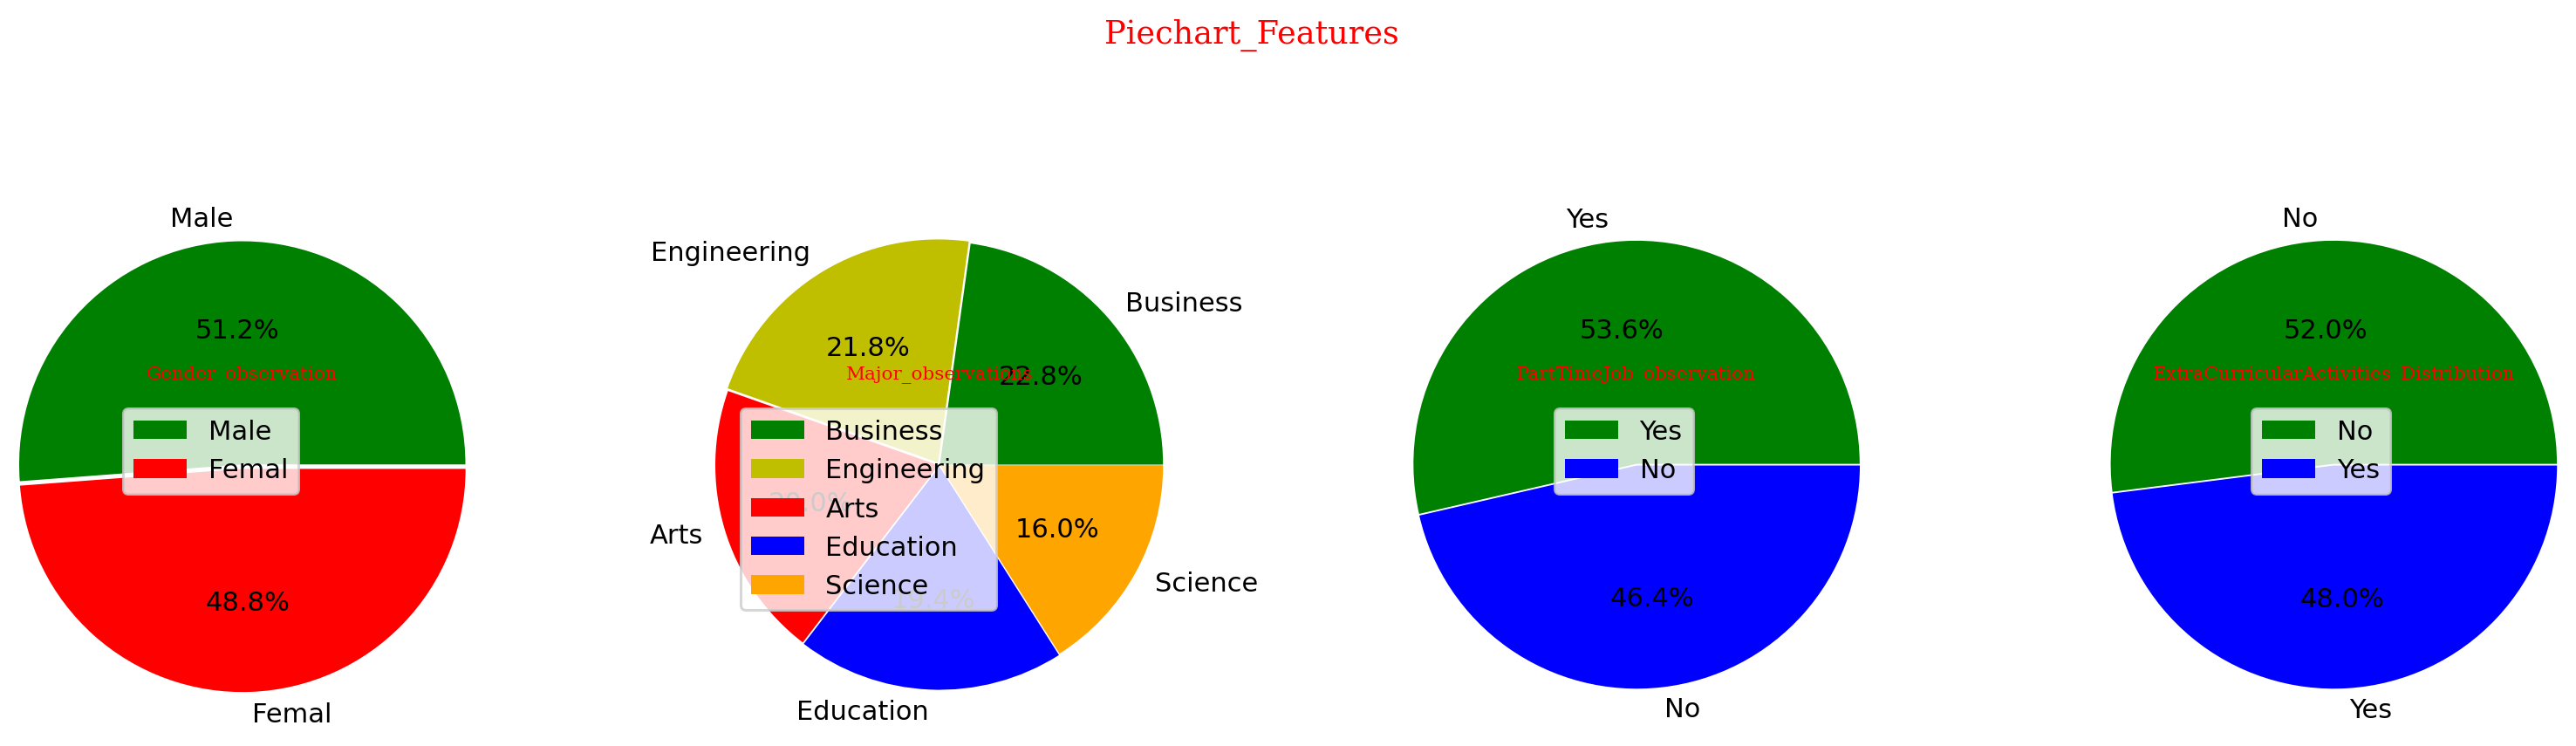

In [39]:
# Font style for titles
f1 = {"family": "serif", "size": 7, "color": "r"}

# Create a figure with a specified size and DPI
plt.figure(figsize=(15, 15), dpi=220)
plt.suptitle("Piechart_Features",fontdict=f1)

# Plot 1
Gender = data["Gender"].value_counts()
plt.subplot(4, 4, 1)  # Create the first subplot
plt.title("Gender_observation", fontdict=f1)
plt.pie(
    x=Gender,
    labels=["Male", "Femal"],
    colors=["g","r"],
    explode=[0.01, 0.07],
    autopct='%1.1f%%',
    radius=4,
)

plt.legend()


# Plot 2

Major = data["Major"].value_counts()
plt.subplot(4, 4, 2)  # Create the second subplot
plt.title("Major_observations", fontdict=f1)
plt.pie(
    x=Major,
    labels=['Business','Engineering','Arts','Education','Science'],
    colors=["g","y","r","b","orange"],
    explode=[0.01, 0.05,0.02,0.03,0.01],
    autopct='%1.1f%%',
    radius=4,
)
plt.legend()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=2,hspace=1)


#plot3:

# to observe how many of the Driving_License :

plt.subplot(4,4,3)
PartTimeJob=data["PartTimeJob"].value_counts()
plt.pie(x=PartTimeJob,labels=["Yes","No"],colors=["g","b"],explode=[0.02,0.01],autopct='%1.1f%%',radius=4)
plt.title("PartTimeJob_observation",fontdict=f1)
plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=4,hspace=1)


#plot4:

# to observe how many of the ExtraCurricularActivities :

plt.subplot(4,4,4)
ExtraCurricularActivities=data["ExtraCurricularActivities"].value_counts()
plt.pie(x=ExtraCurricularActivities,labels=["No","Yes"],colors=["g","b"],explode=[0.02,0.01],autopct='%1.1f%%',radius=4)
plt.title("ExtraCurricularActivities_Distribution",fontdict=f1)
plt.legend()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=4,hspace=1)

plt.show()

In [40]:
pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 38.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install Waffle

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.5 MB/s eta 0:00:00
  Created wheel for Waffle: filename=waffle-0.5.0-py3-none-any.whl size=16513 sha256=750caa462ed63036ab719bb06739295eca60bd8408fd8b8d2f46d6bae942aad9
  Stored in directory: /root/.cache/pip/wheels/49/81/51/88aedf28aaf857bf03efcb70a30fbcf2140032ace1f83e3514
Successfully built Waffle
Note: you may need to restart the kernel to use updated packages.


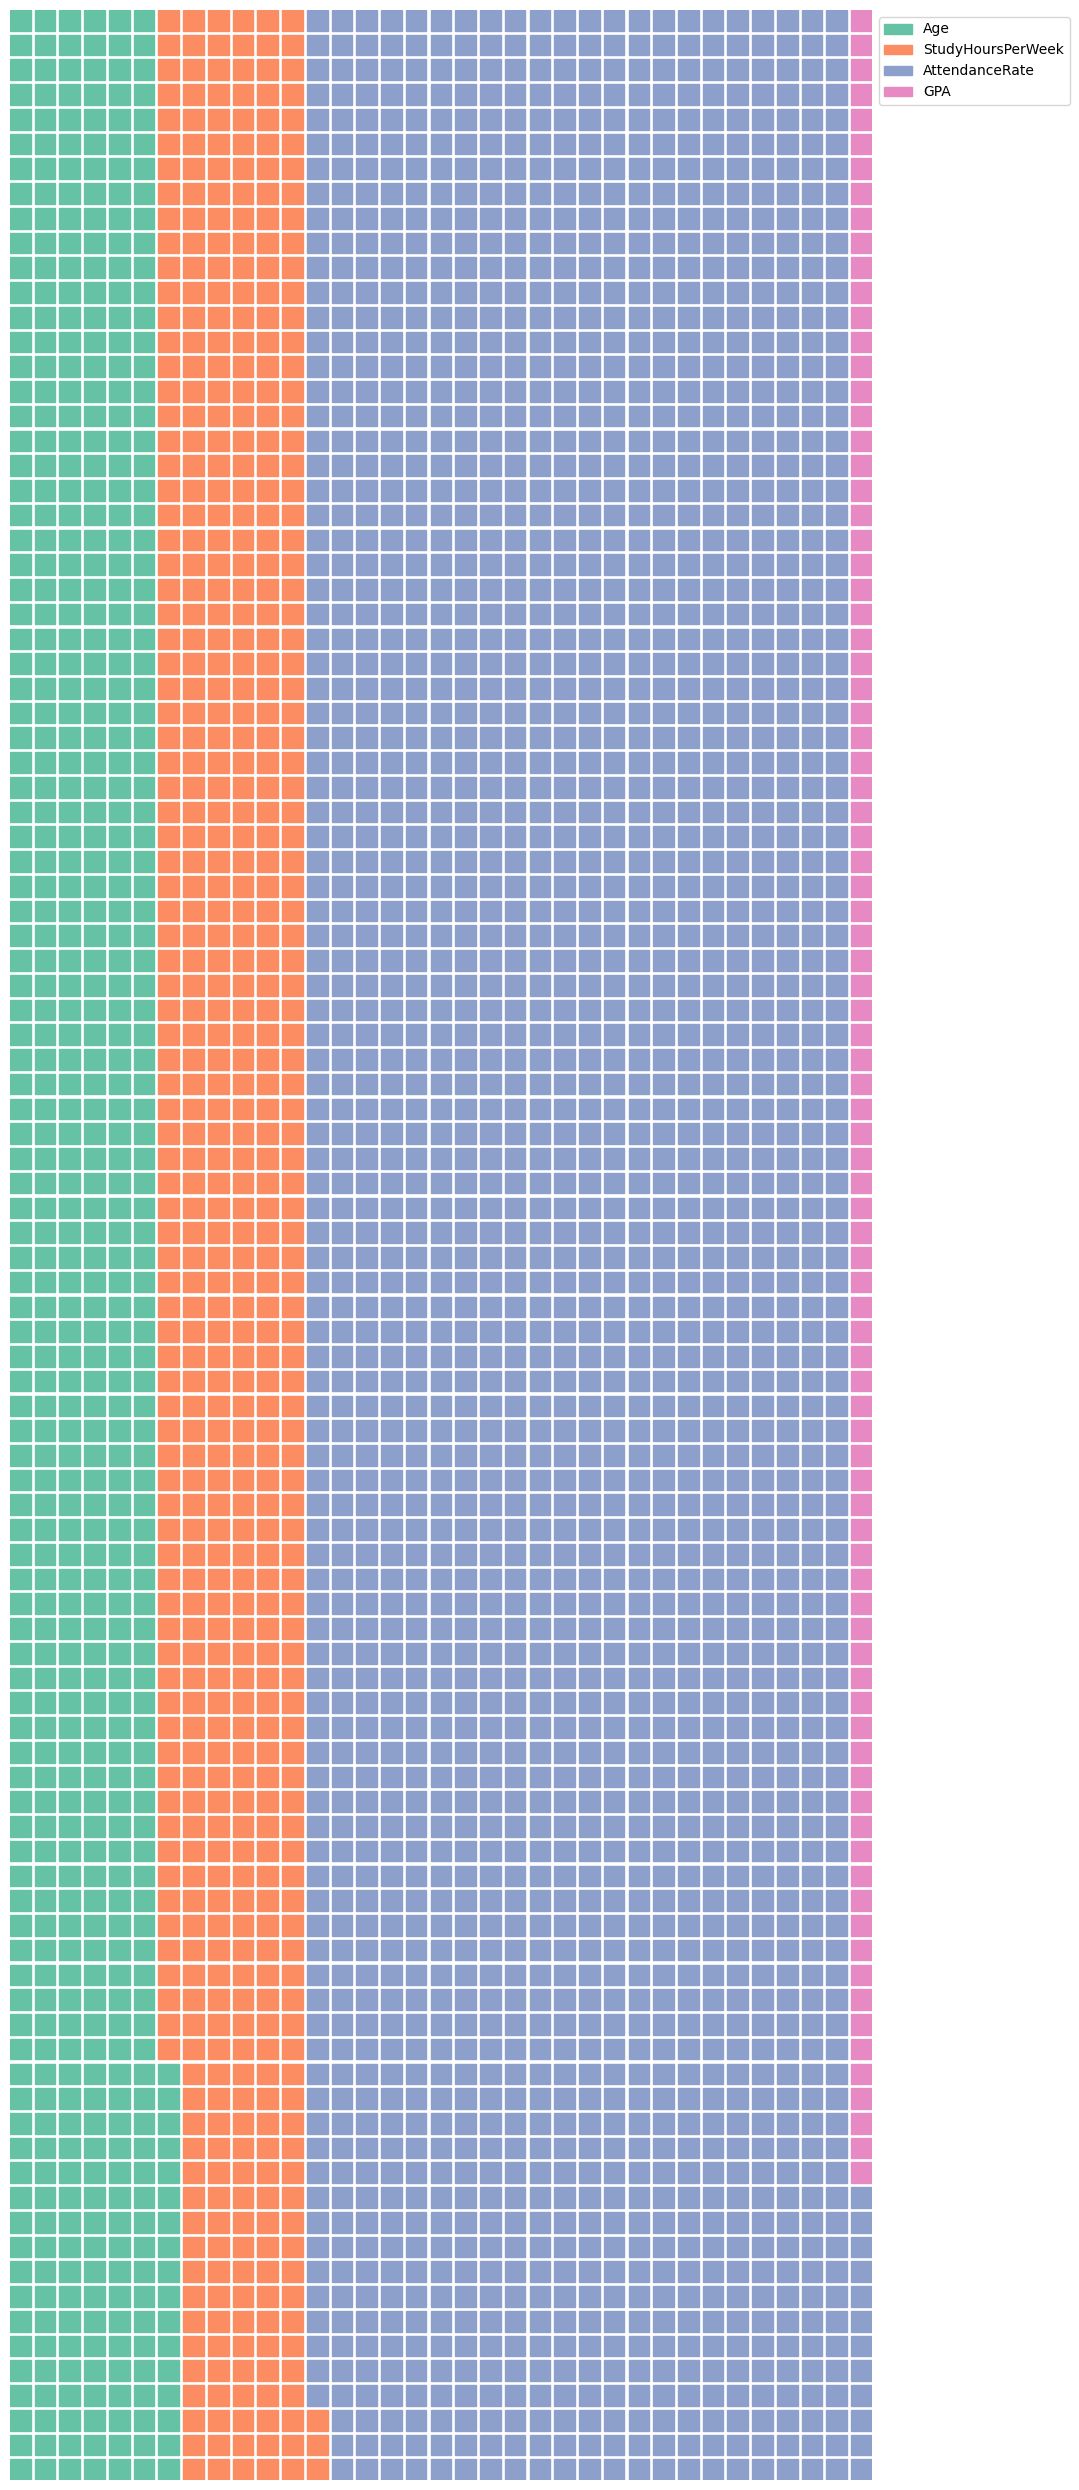

In [42]:
# Make a waffel for the Data:
# from this waffle i see which Feature is a controled on other features :

from pywaffle import Waffle

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
values = data[numeric_columns].sum().tolist()

fig = plt.figure(
    FigureClass=Waffle,
    rows=100,
    columns=35,
    values=values,
    legend={'labels': numeric_columns.tolist(),
            'loc': "upper left",
            'bbox_to_anchor': (1, 1)},
    figsize=(25, 25)
)
plt.show()

In [43]:
import plotly.graph_objects as go

# observation for Gender vs.StudyHoursPerWeek :

x = data["Gender"]
y = data["StudyHoursPerWeek"]

# Create a bar plot using plotly.graph_objects
fig = go.Figure(data=[go.Bar(x=x, y=y,orientation='h')])

# Update the layout
fig.update_layout(title="Observation Gender vs. StudyHoursPerWeek", xaxis_title="Gender", yaxis_title="StudyHoursPerWeek")

# Show the figure
fig.show()


# observation for Gender vs.AttendanceRate

x1 = data["Gender"]
y1 = data["AttendanceRate"]

# Create a bar chart using plotly.express
fig = px.bar(data, x='Gender', y='AttendanceRate', title='Observation Gender vs. AttendanceRate')

# Update the layout
fig.update_layout(xaxis_title="Gender", yaxis_title="AttendanceRate")

# Show the figure
fig.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'StudyHoursPerWeek'}>],
       [<Axes: title={'center': 'AttendanceRate'}>,
        <Axes: title={'center': 'GPA'}>]], dtype=object)

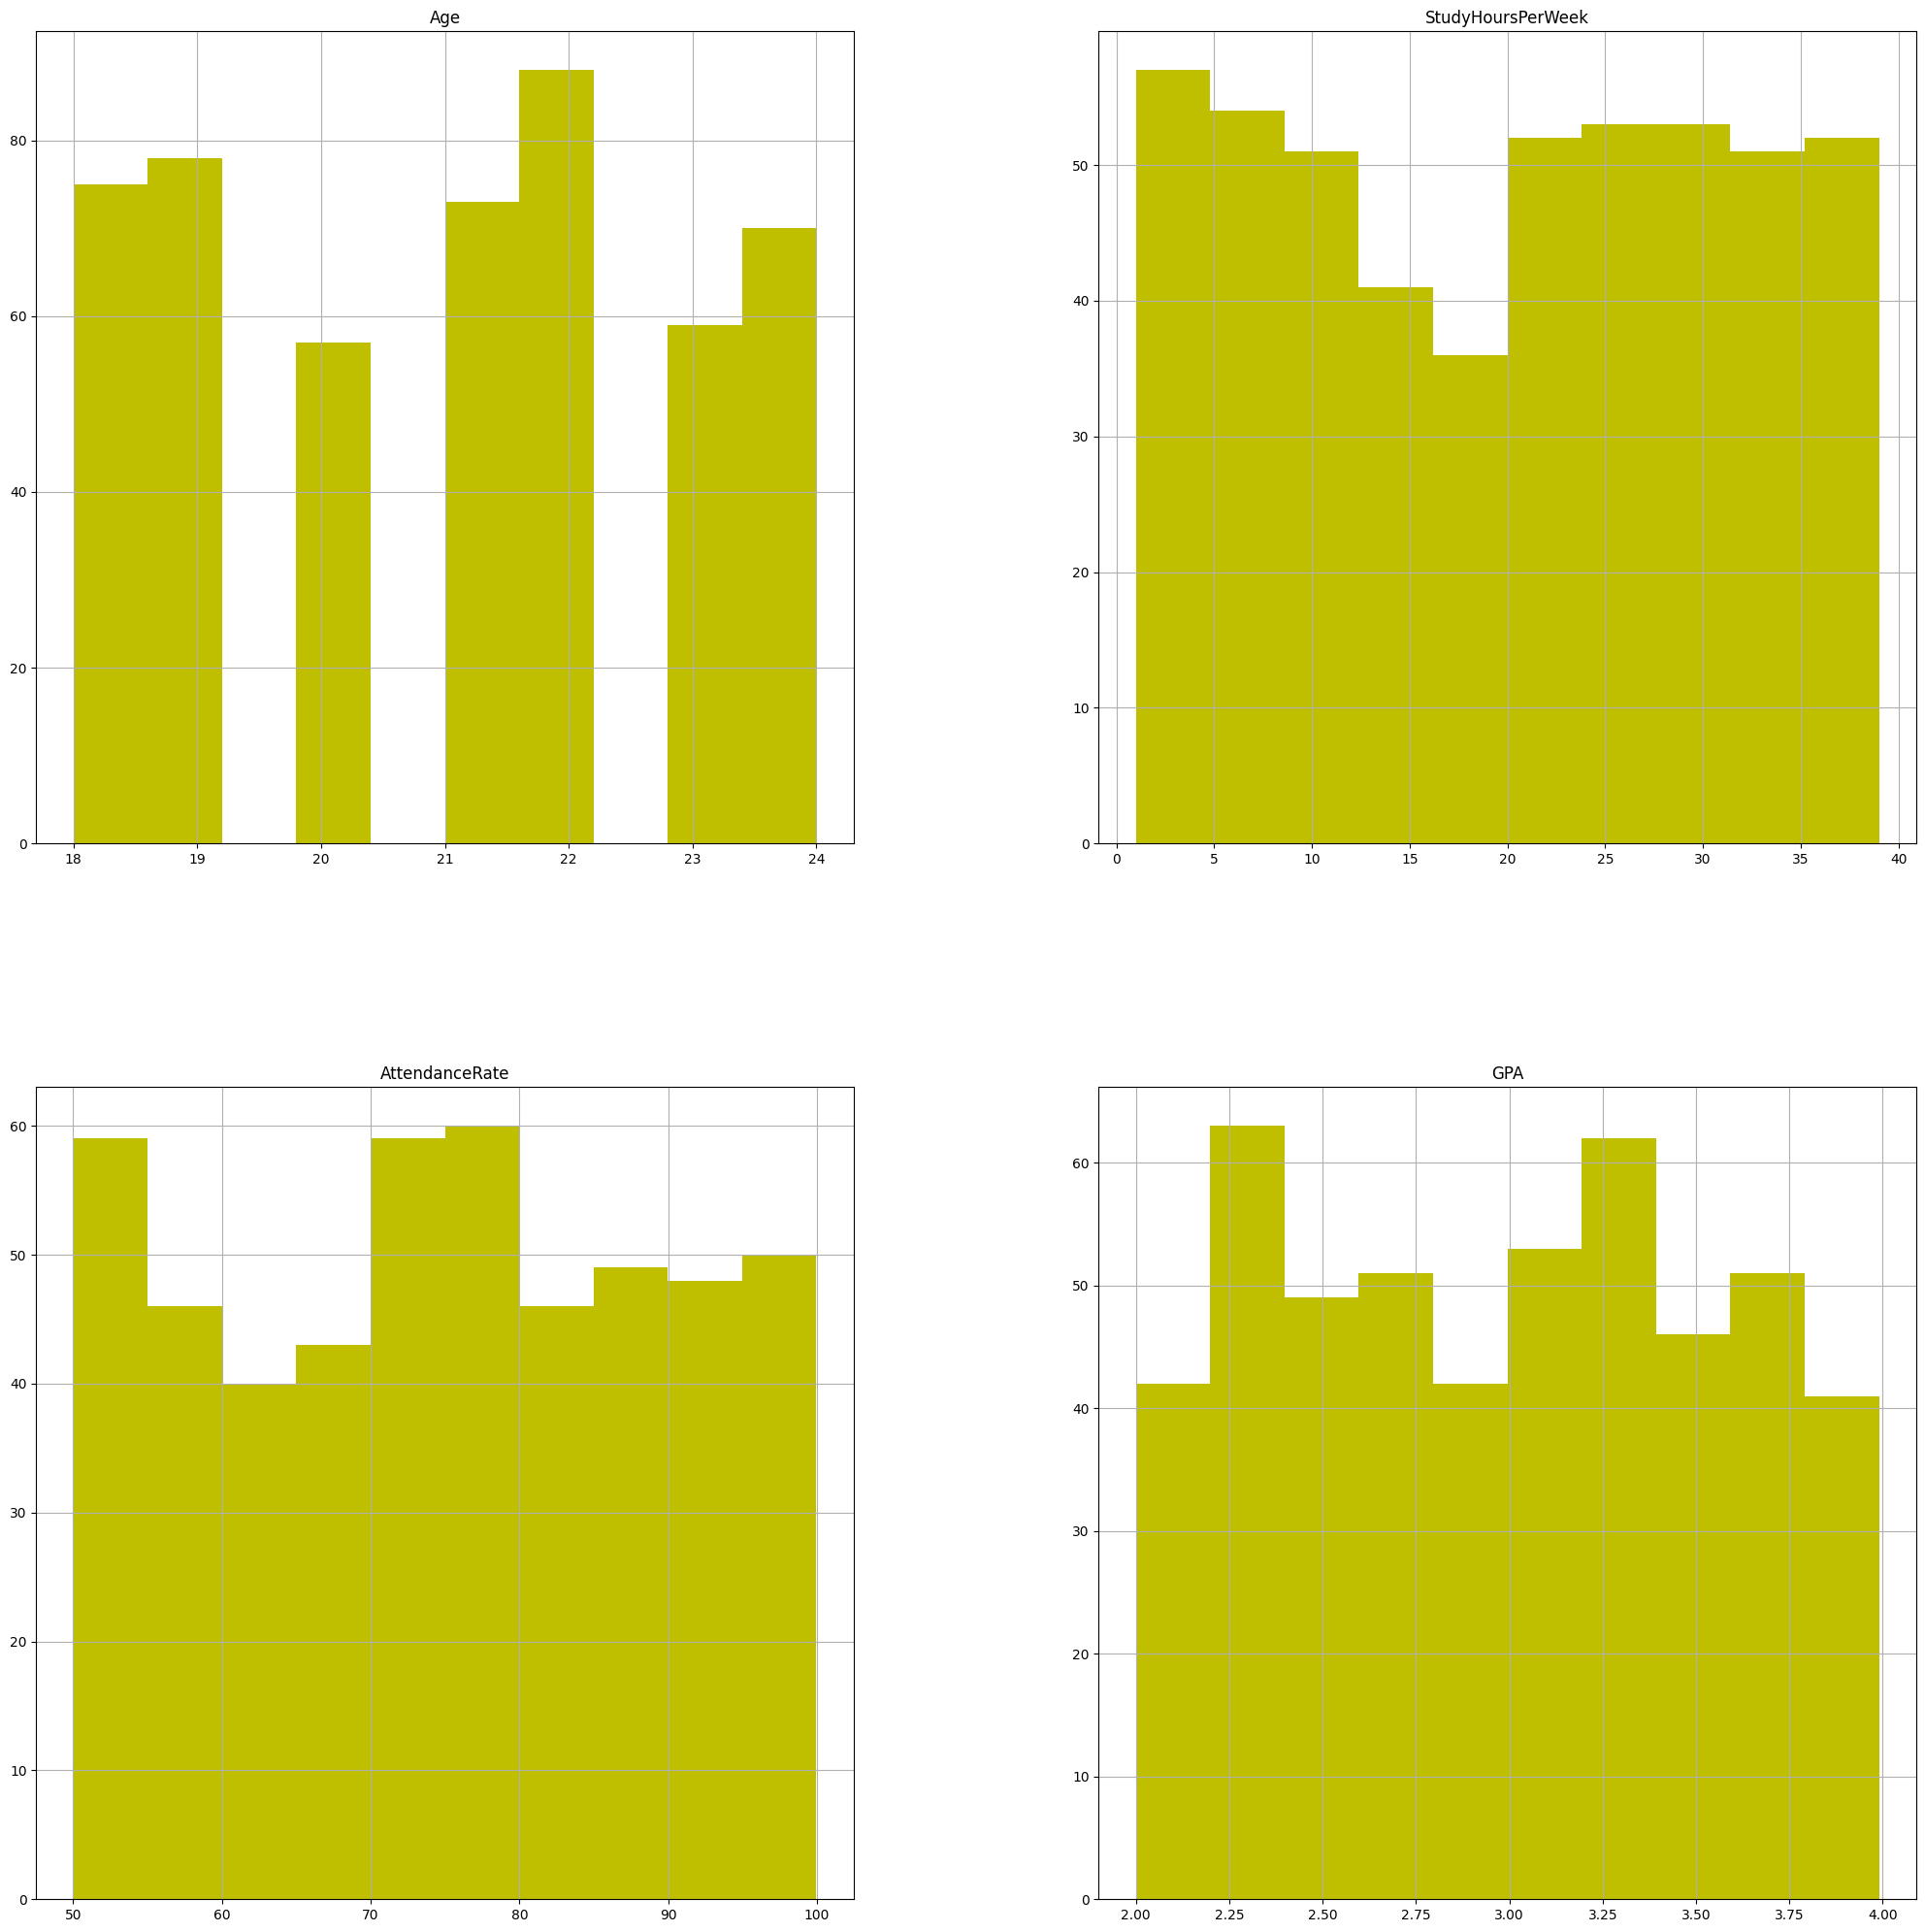

In [44]:
# plot the histgram:
data.hist(figsize=(25,25),color="y")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 3600x3000 with 0 Axes>

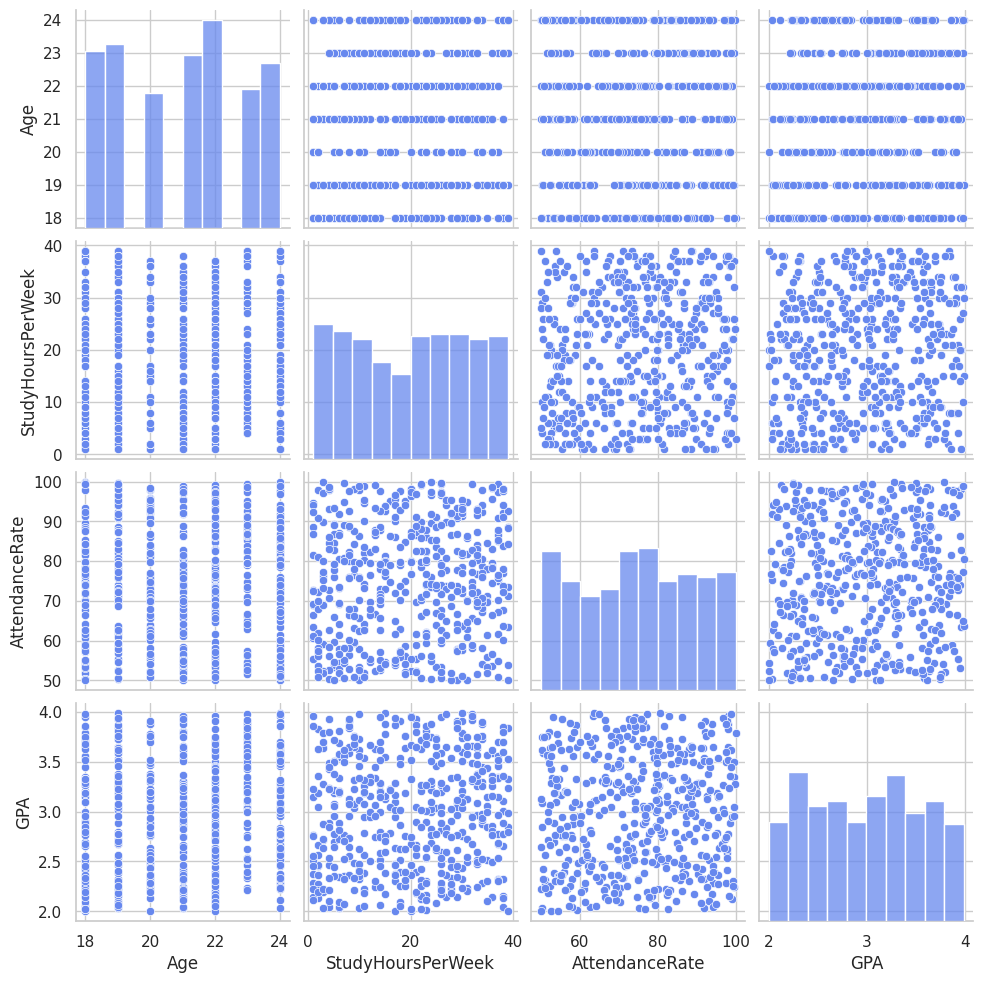

In [45]:
# observe for the float_data
plt.figure(figsize=(30, 25), dpi=120)
sns.set(style="whitegrid")  # Set the plot style
sns.set_palette("coolwarm")    # Set the color palette
sns.pairplot(data.select_dtypes(include='float64'))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



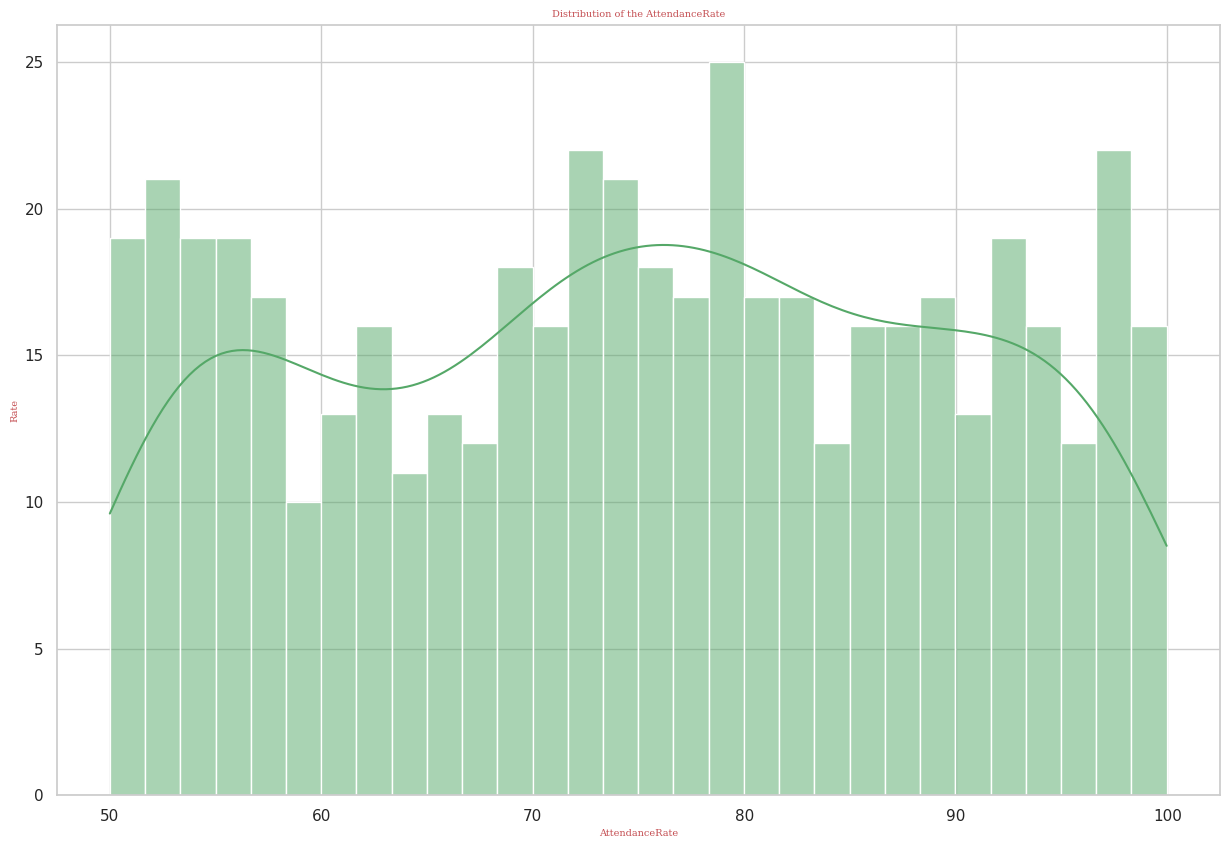

In [46]:
#observe the Vintage distribution:

plt.figure(figsize=(15,10))
plt.title("Distribution of the AttendanceRate",fontdict=f1)
plt.xlabel("AttendanceRate",fontdict=f1)
plt.ylabel("Rate",fontdict=f1)
sns.histplot(data["AttendanceRate"],color="g",bins=30,kde=True,label="AttendanceRate")
plt.show()

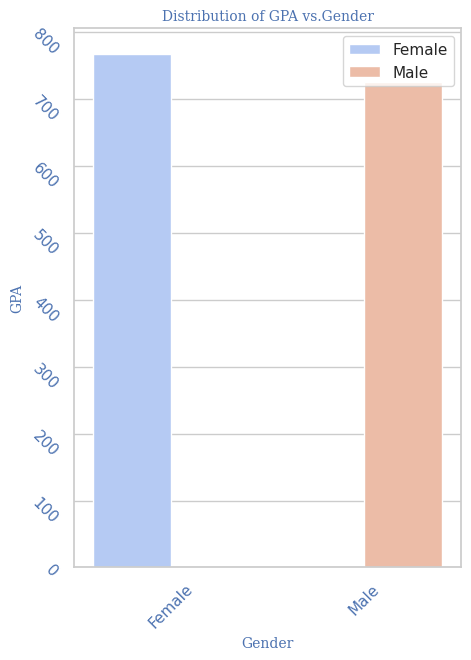

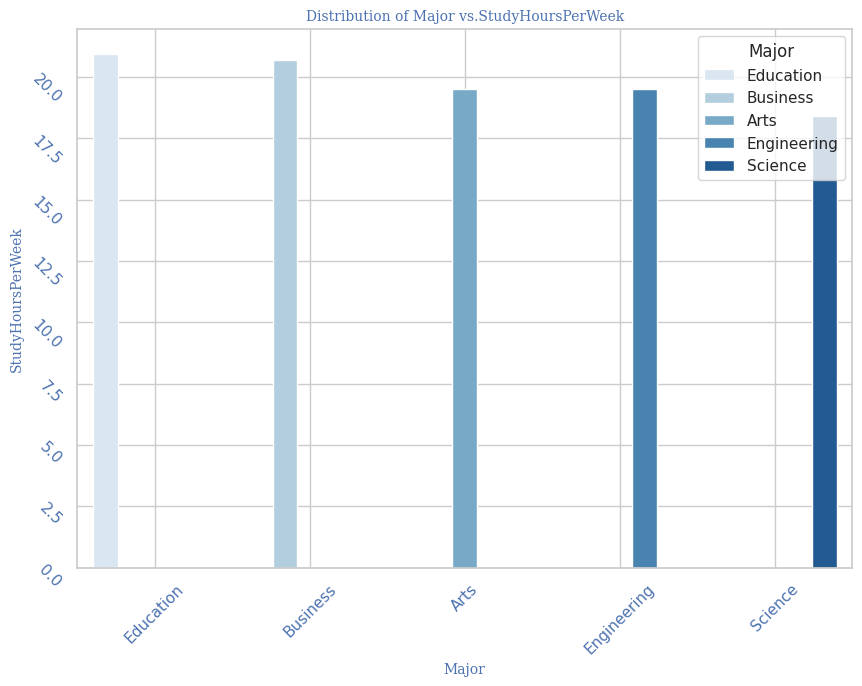

In [47]:
# observe the GPA vs.Gender:

f2={"family":"serif","size":10,"color":"b"}


#barplot 1:

plt.figure(figsize=(5,7))

plt.title("Distribution of GPA vs.Gender",fontdict=f2)
top3=data.groupby("Gender")["GPA"].sum().sort_values(ascending=False)

sns.barplot(x=top3.index,y=top3.values,hue=top3.index,color="r",palette='coolwarm')

plt.xticks(rotation=45,color="b")
plt.xlabel("Gender",fontdict=f2)
plt.ylabel("GPA",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------

# barplot 2 :

plt.figure(figsize=(10,7))
plt.title("Distribution of Major vs.StudyHoursPerWeek",fontdict=f2)

top4=data.groupby("Major")["StudyHoursPerWeek"].mean().sort_values(ascending=False)
sns.barplot(x=top4.index,y=top4.values,hue=top4.index,color="r",palette='Blues')

plt.xticks(rotation=45,color="b")
plt.xlabel("Major",fontdict=f2)
plt.ylabel("StudyHoursPerWeek",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



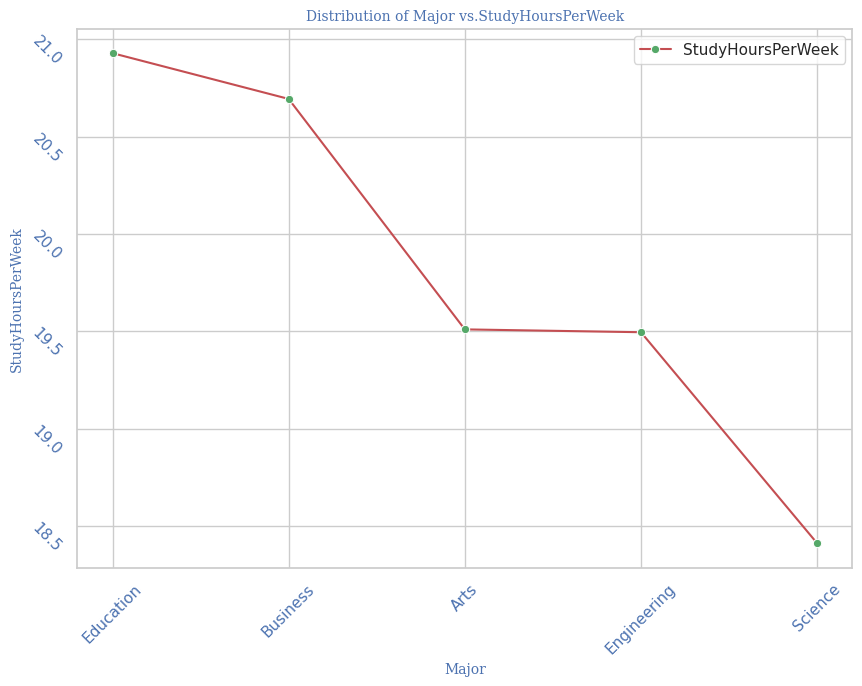

In [48]:
#Lineplot 1 :

plt.figure(figsize=(10,7))
plt.title("Distribution of Major vs.StudyHoursPerWeek",fontdict=f2)

top4=data.groupby("Major")["StudyHoursPerWeek"].mean().sort_values(ascending=False)
sns.lineplot(x=top4.index,y=top4.values,color="r",label="StudyHoursPerWeek",marker="o",mfc="g")

plt.xticks(rotation=45,color="b")
plt.xlabel("Major",fontdict=f2)
plt.ylabel("StudyHoursPerWeek",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

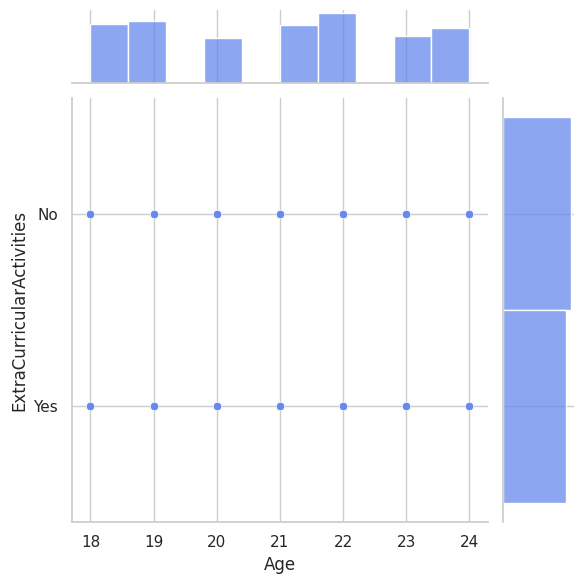

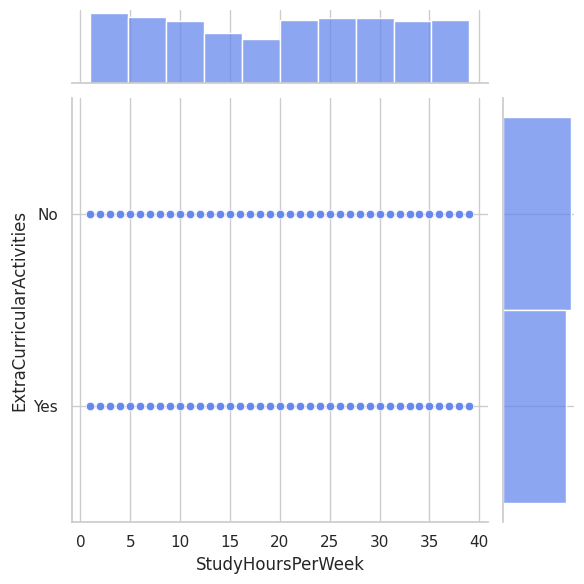

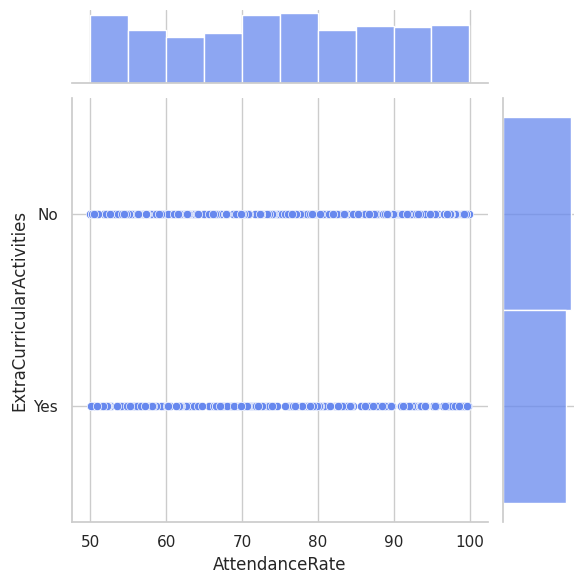

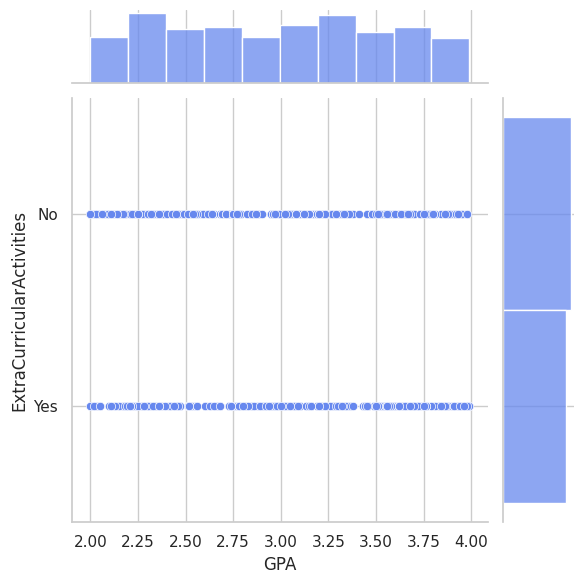

In [49]:
for col in data.select_dtypes("number"):
    if col !="ExtraCurricularActivities":
       with sns.axes_style("white"):
          sns.set(style="whitegrid")  # Set the plot style
          sns.set_palette("coolwarm")    # Set the color palette
          sns.jointplot(x=data[col],y=data["ExtraCurricularActivities"],kind="scatter")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



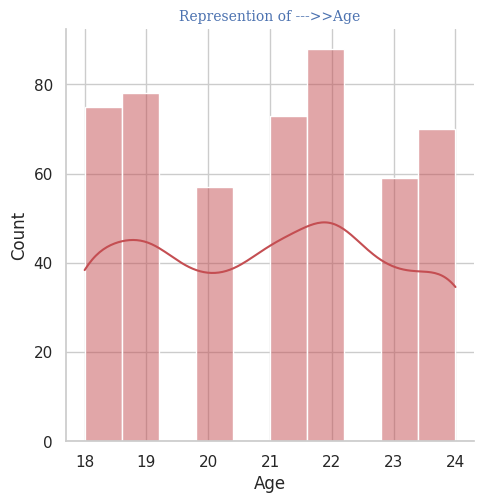

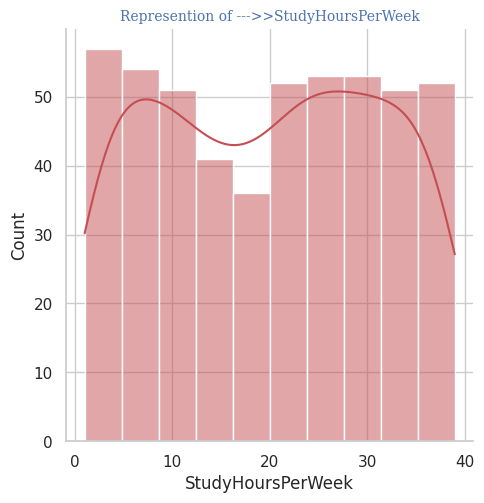

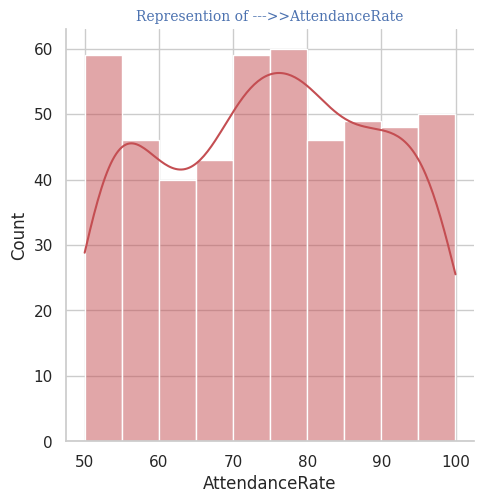

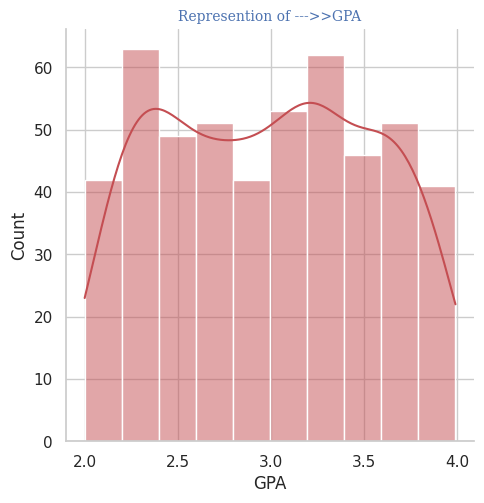

In [50]:
for col in data.select_dtypes(include="float64").columns:
    sns.displot(data[col],kde=True,color="r",label=col)
    sns.set(style="whitegrid")  # Set the plot style
    sns.set_palette("coolwarm")    # Set the color palette
    plt.title("Represention of --->>"+col,fontdict=f2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



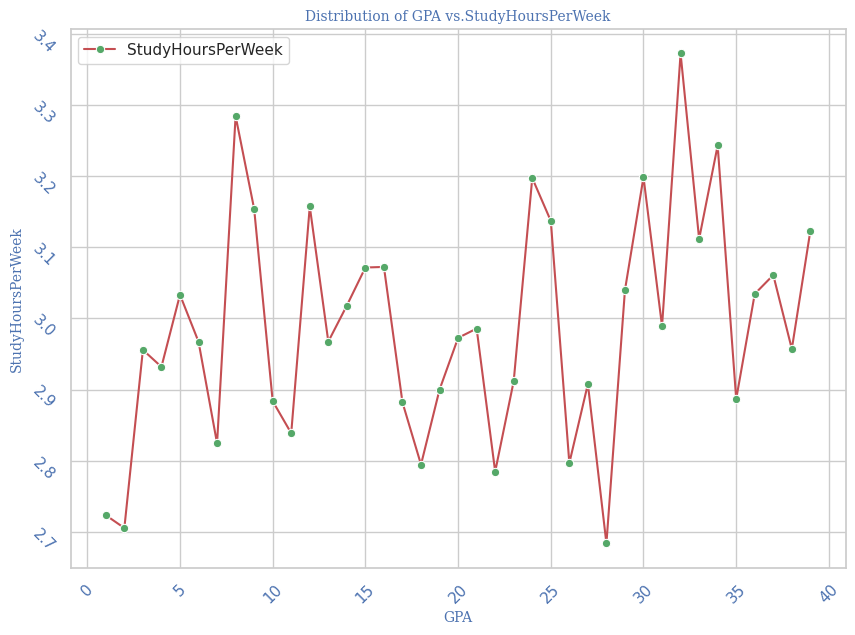

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



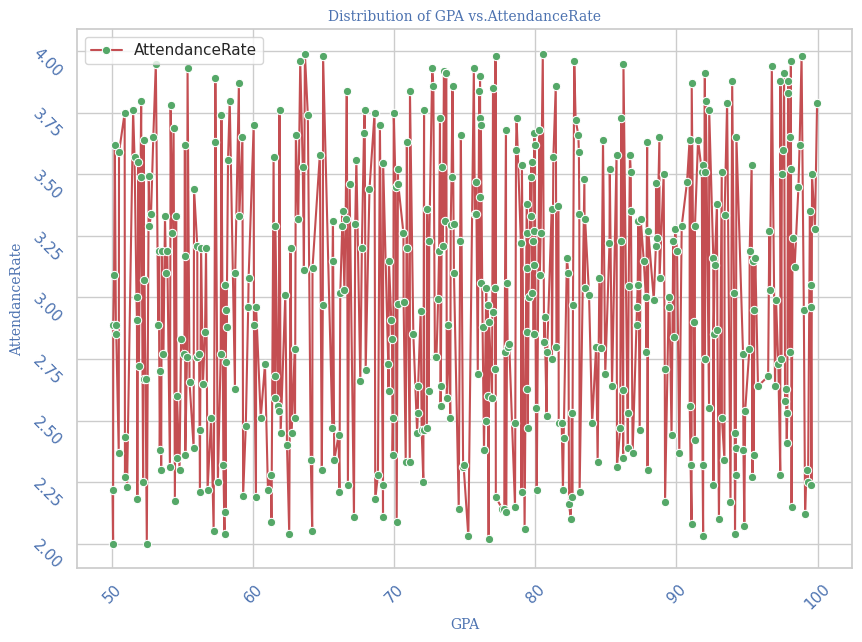

In [51]:
# observation between GPA vs.StudyHoursPerWeek :

plt.figure(figsize=(10,7))
plt.title("Distribution of GPA vs.StudyHoursPerWeek",fontdict=f2)

top4=data.groupby("StudyHoursPerWeek")["GPA"].mean().sort_values(ascending=False)
sns.lineplot(x=top4.index,y=top4.values,color="r",label="StudyHoursPerWeek",marker="o",mfc="g")

plt.xticks(rotation=45,color="b")
plt.xlabel("GPA",fontdict=f2)
plt.ylabel("StudyHoursPerWeek",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()

# observation between GPA vs.AttendanceRate

plt.figure(figsize=(10,7))
plt.title("Distribution of GPA vs.AttendanceRate",fontdict=f2)

top4=data.groupby("AttendanceRate")["GPA"].mean().sort_values(ascending=False)
sns.lineplot(x=top4.index,y=top4.values,color="r",label="AttendanceRate",marker="o",mfc="g")

plt.xticks(rotation=45,color="b")
plt.xlabel("GPA",fontdict=f2)
plt.ylabel("AttendanceRate",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()


 ##  Data processing and Training :(convert Categorical , Labelencoder,StandardScaler)

In [52]:
# convert Categorical into Numerical :
# Convert all Categorical columns into Numerical columns :
label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data    

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,6,36,379,136,0,1,0
1,0,4,36,226,30,2,0,0
2,1,4,9,35,36,1,0,0
3,1,6,9,177,135,4,1,0
4,1,0,18,225,29,2,1,0
...,...,...,...,...,...,...,...,...
495,1,4,36,243,92,4,0,0
496,1,5,10,67,113,4,0,0
497,0,2,5,70,113,4,0,1
498,1,4,17,73,5,1,0,1


In [53]:
# selecting numerical features :
numerical_features = data.select_dtypes(include=['number'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Create a DataFrame from the scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_df

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1.024295,1.523131,1.494258,1.071923,0.843351,-1.393789,0.930415,-0.960769
1,-0.976281,0.522388,1.494258,-0.049243,-1.204555,0.065676,-1.074789,-0.960769
2,1.024295,0.522388,-0.861790,-1.448869,-1.088636,-0.664057,-1.074789,-0.960769
3,1.024295,1.523131,-0.861790,-0.408310,0.824031,1.525141,0.930415,-0.960769
4,1.024295,-1.479098,-0.076441,-0.056571,-1.223875,0.065676,0.930415,-0.960769
...,...,...,...,...,...,...,...,...
495,1.024295,0.522388,1.494258,0.075331,-0.006723,1.525141,-1.074789,-0.960769
496,1.024295,1.022759,-0.774529,-1.214377,0.398994,1.525141,-1.074789,-0.960769
497,-0.976281,-0.478355,-1.210834,-1.192393,0.398994,1.525141,-1.074789,1.040833
498,1.024295,0.522388,-0.163702,-1.170409,-1.687551,-0.664057,-1.074789,1.040833


## Explantory on Dataset: (correlations , outliers ,Anova ,heatmap) :

In [54]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [55]:
class Var_Selector(BaseEstimator,TransformerMixin):

    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])

        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)

        # remove high-low cardinality categorical:-

        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index

        return data.drop(columns=removed_cols)


In [56]:
transform=Var_Selector(data)
transform.fit_transform(data)


,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,6,36,379,136,0,1,0
1,0,4,36,226,30,2,0,0
2,1,4,9,35,36,1,0,0
3,1,6,9,177,135,4,1,0
4,1,0,18,225,29,2,1,0
...,...,...,...,...,...,...,...,...
495,1,4,36,243,92,4,0,0
496,1,5,10,67,113,4,0,0
497,0,2,5,70,113,4,0,1
498,1,4,17,73,5,1,0,1


In [57]:
# Check if there are aduplicated values in the data:
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)

Number of duplicates ----->>>  0


In [58]:
# Calculate the correlation :

corr=data.select_dtypes("number").corr()

print("Correlation -->>"+"\n",corr)
print("-"*50)

sperman=data.select_dtypes("number").corr(method="spearman")
print("sperman -->>"+"\n",sperman)
print("-"*50)
pearson=data.select_dtypes("number").corr(method="pearson")
print("pearson -->>"+"\n",pearson)
print("-"*50)
kendall=data.select_dtypes("number").corr(method="kendall")
print("kendall -->>"+"\n",kendall)

Correlation -->>
                              Gender       Age  StudyHoursPerWeek  \
Gender                     1.000000  0.081556          -0.013178   
Age                        0.081556  1.000000          -0.015695   
StudyHoursPerWeek         -0.013178 -0.015695           1.000000   
AttendanceRate            -0.064758  0.035067           0.090472   
GPA                       -0.019164  0.096896           0.092482   
Major                     -0.005956  0.069391          -0.037643   
PartTimeJob                0.009756 -0.028511          -0.010767   
ExtraCurricularActivities -0.065031  0.011137           0.003409   

                           AttendanceRate       GPA     Major  PartTimeJob  \
Gender                          -0.064758 -0.019164 -0.005956     0.009756   
Age                              0.035067  0.096896  0.069391    -0.028511   
StudyHoursPerWeek                0.090472  0.092482 -0.037643    -0.010767   
AttendanceRate                   1.000000  0.059525 -0.00

(0.0, 192.15)

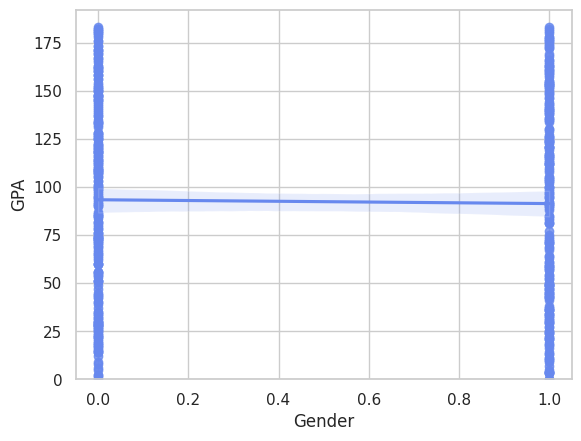

In [59]:
# No Rellation  Found between Gender & GPA :
sns.regplot(x=data["Gender"],y=data["GPA"])
plt.ylim(0,)

(0.0, 192.15)

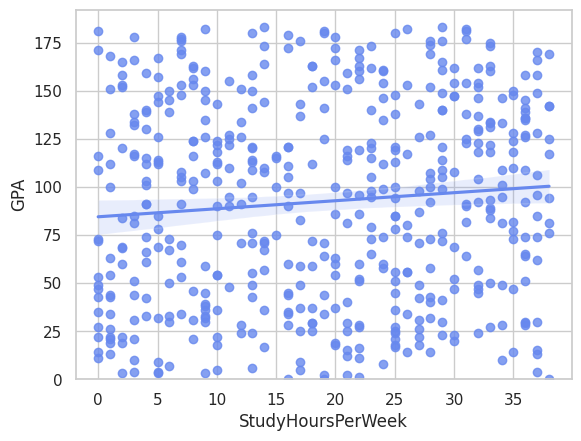

In [60]:
# Type of Relation between StudyHoursPerWeek & GPA  positve Relation:
sns.regplot(x=data["StudyHoursPerWeek"],y=data["GPA"])
plt.ylim(0,)

(0.0, 494.55)

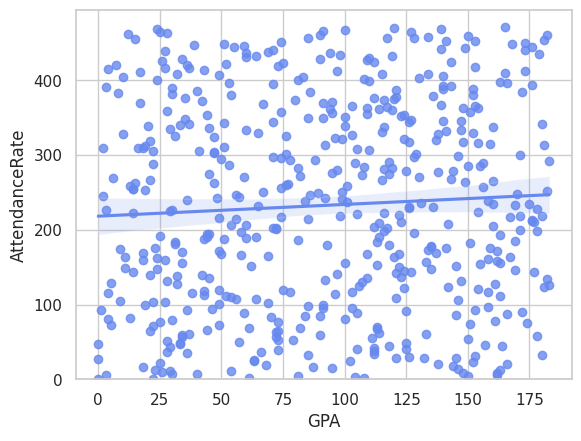

In [61]:
# Type pf Relation between Attendance & GPA is positve :

sns.regplot(x=data["GPA"],y=data["AttendanceRate"])
plt.ylim(0,)

Text(0.5, 1.0, 'Correlation_heatmap_Matrix')

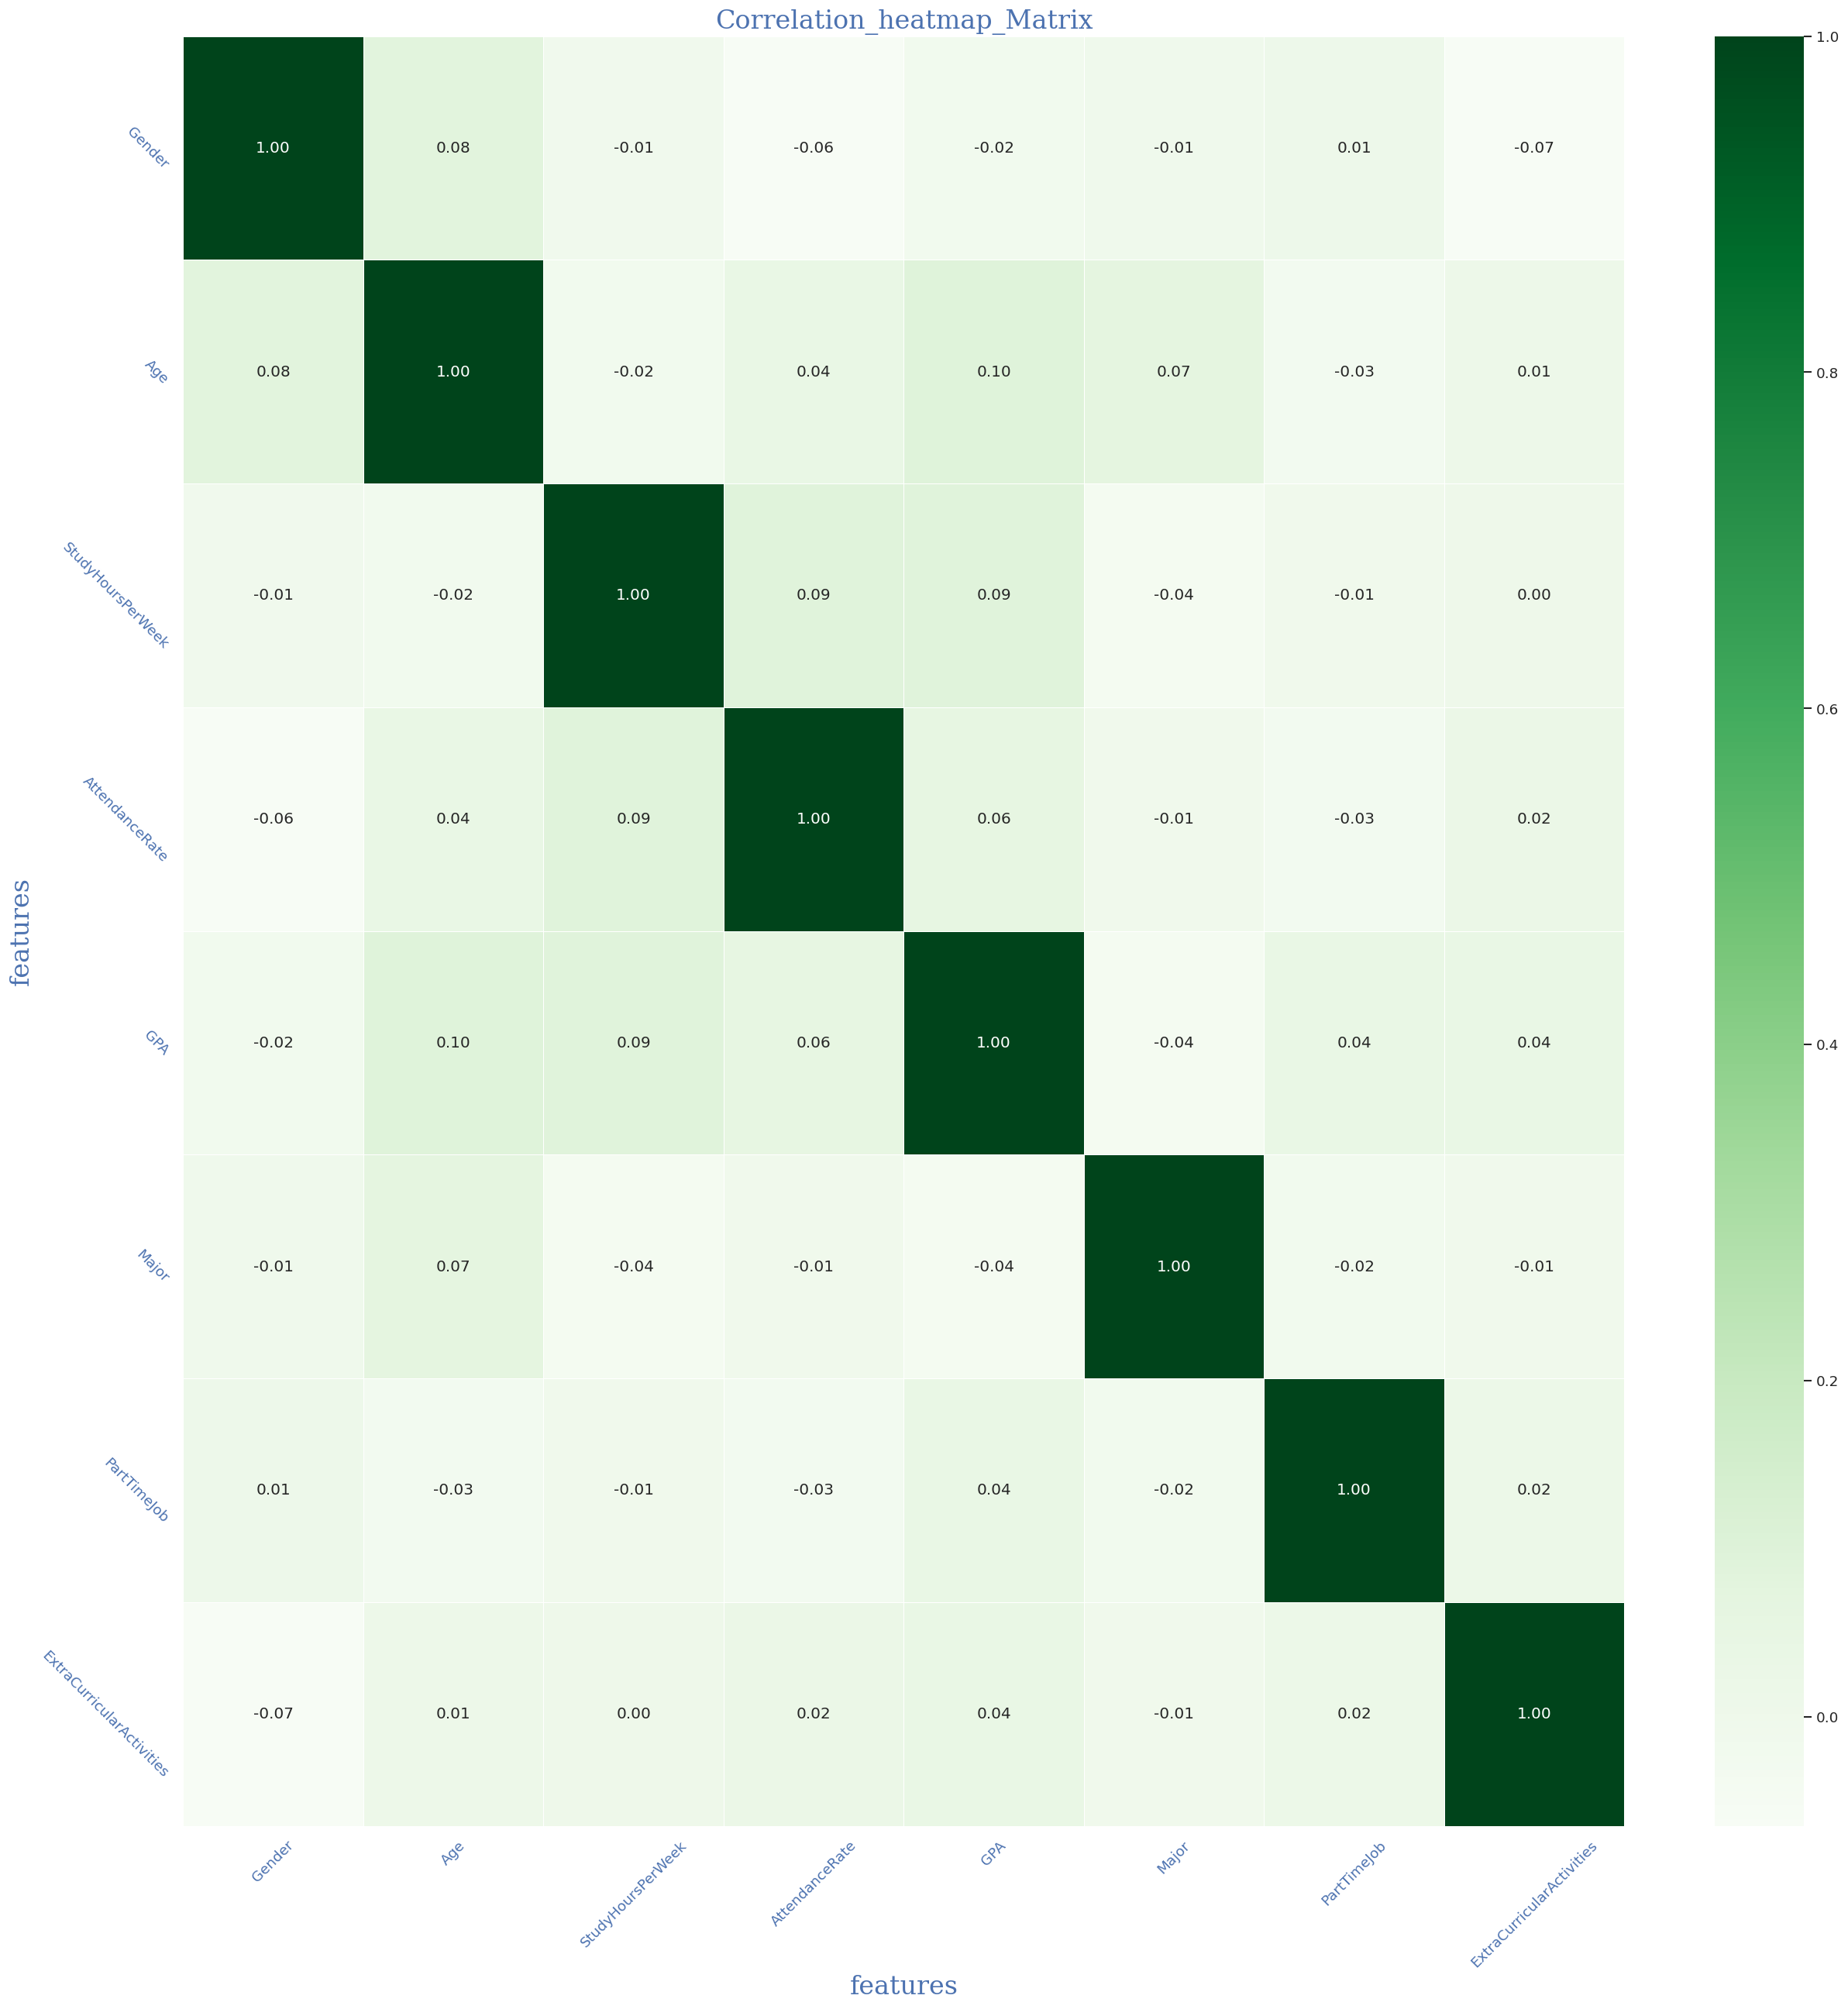

In [62]:
# plot the heatmap:
# plot the heatmap_Correlation_MatRix:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(25,25),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='Greens',linewidths=0.5)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.xlabel("features",fontdict=f1)
plt.ylabel("features",fontdict=f1)
plt.title("Correlation_heatmap_Matrix",fontdict=f1)


In [63]:
features=data.select_dtypes(include="number").columns

for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in Gender feature
Q1 of Gender --->>> 0.0 
 Q3 of Gender ---->>> 1.0 
 iqr--->>1.0
 low_limit--->>>-1.5 
  upper_limit--->>> 2.5 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in Age feature
Q1 of Age --->>> 1.0 
 Q3 of Age ---->>> 5.0 
 iqr--->>4.0
 low_limit--->>>-5.0 
  upper_limit--->>> 11.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in StudyHoursPerWeek feature
Q1 of StudyHoursPerWeek --->>> 9.0 
 Q3 of StudyHoursPerWeek ---->>> 29.0 
 iqr--->>20.0
 low_limit--->>>-21.0 
  upper_limit--->>> 59.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in AttendanceRate feature
Q1 of AttendanceRate --->>> 116.75 
 Q3 of AttendanceRate ---->>> 350.25 
 iqr--->>233.5
 low_limit--->>>-233.5 
  upper_limit--->>> 700.5 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> th

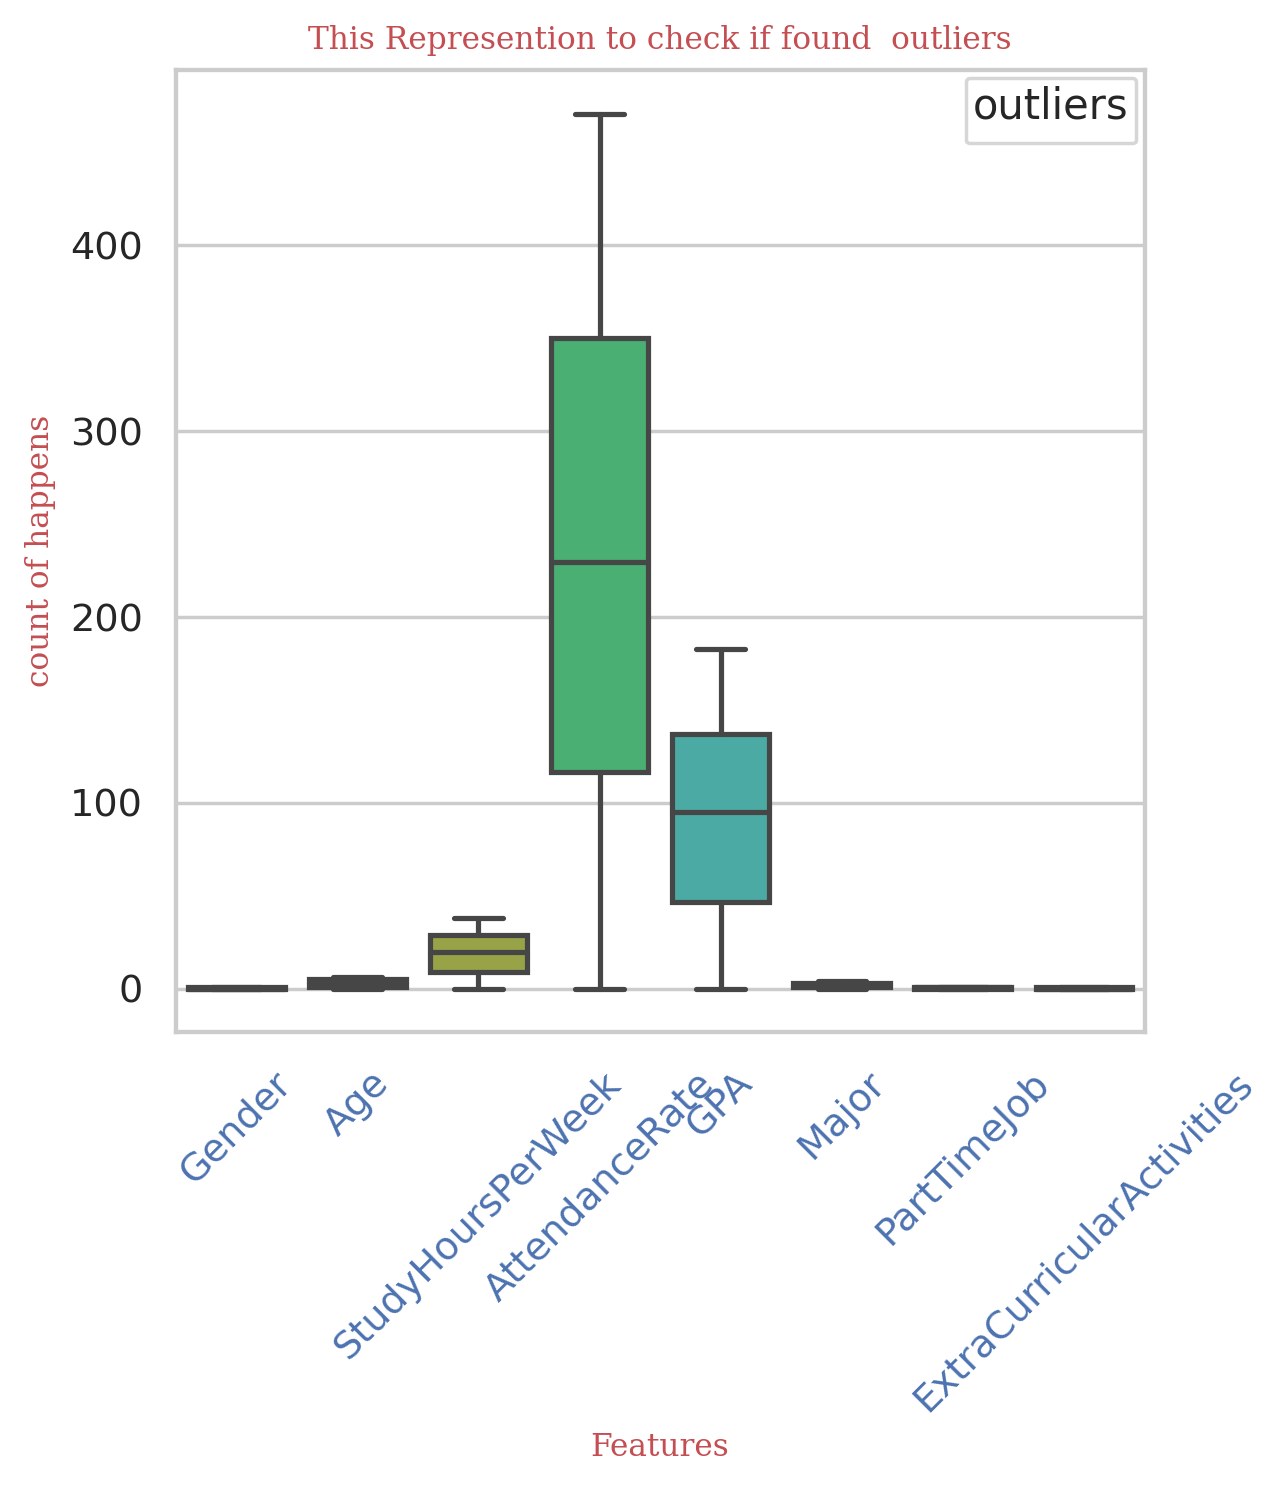

In [64]:
# from this Represention we discover that we found outlier in the  Anematic Feature :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(5,5),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

upper_limit :  8.957550901763053
lower_limit :  -3.0455509017630535
Mean Value :  2.956
Median Value :  3.0
1st Standard Deviation :  2.000516967254351


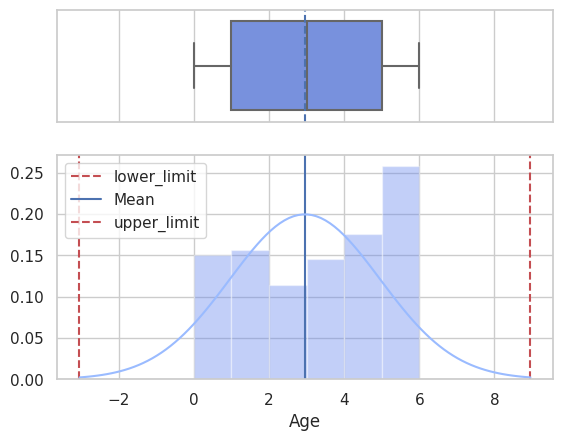

In [65]:
#Another way to calculate outlier on Age feature:-
# NO Outlier in Feature Age:

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.Age.mean()
std = data.Age.std()
median = data.Age.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["Age"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["Age"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

upper_limit :  53.29004173498187
lower_limit :  -15.53804173498187
Mean Value :  18.876
Median Value :  19.5
1st Standard Deviation :  11.471347244993957


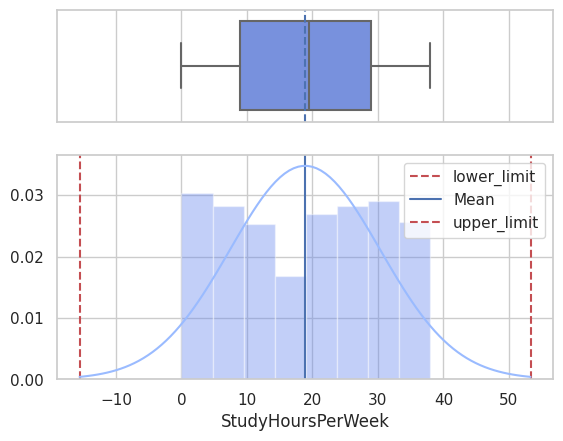

In [66]:
#Another way to calculate outlier on Age feature:-
# NO Outlier in Feature StudyHoursPerWeek:

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.StudyHoursPerWeek.mean()
std = data.StudyHoursPerWeek.std()
median = data.StudyHoursPerWeek.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["StudyHoursPerWeek"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["StudyHoursPerWeek"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [67]:
# Extract the most important Numerical Features:

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="ExtraCurricularActivities").select_dtypes("number").fillna(0),data["ExtraCurricularActivities"])

SelectKBest(k=5)

In [68]:
featurs_values=pd.DataFrame(fs.pvalues_)
features_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="ExtraCurricularActivities").select_dtypes("number").fillna(0).columns)


In [69]:
feature_score=pd.concat([featurs_values,features_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

,pvalues,score,input
0,0.146493,2.114986,Gender
1,0.803810,0.061778,Age
2,0.939383,0.005789,StudyHoursPerWeek
3,0.595069,0.282862,AttendanceRate
4,0.380212,0.771388,GPA
5,0.875733,0.024480,Major
6,0.672598,0.178789,PartTimeJob


In [70]:
# Extract the most important Categorical Features :
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="ExtraCurricularActivities").select_dtypes("number").fillna(0),data["ExtraCurricularActivities"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="ExtraCurricularActivities").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

Gender               0.000000
Age                  0.000000
StudyHoursPerWeek    0.000000
AttendanceRate       0.000000
Major                0.000000
PartTimeJob          0.000000
GPA                  0.020322
dtype: float64

## End of Project 

 * Devloper : AbdalRahman Gameel Ahmed Hebishy
 
 -->> if you see that my Notebook useful upvote me 
 
 * Kaggle   : https://www.kaggle.com/abdalrhamnhebishy